In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
map_reduce_df = pd.read_csv('map_reduce.csv')
spark_df = pd.read_csv('spark.csv')

# Display the heads of the dataframes to understand their structure
print(map_reduce_df.head())
print(spark_df.head())

                                           Task  Iteration 01  Iteration 02  \
0        Year wise carrier delay from 2003-2010         6.551         5.341   
1            Year wise NAS delay from 2003-2010         4.626         5.027   
2        Year wise Weather delay from 2003-2010         5.127         4.951   
3  Year wise late aircraft delay from 2003-2010         5.208         5.478   
4       Year wise security delay from 2003-2010         4.576         5.215   

   Iteration 03  Iteration 04  Iteration 05  
0         5.617         4.643         5.283  
1         4.906         0.584         4.990  
2         5.858         5.489         5.598  
3         4.955         0.532         5.265  
4         0.522         0.360         5.202  
                                           Task  Iteration 01  Iteration 02  \
0        Year wise carrier delay from 2003-2010         9.717         0.601   
1            Year wise NAS delay from 2003-2010         0.398         7.543   
2        Yea

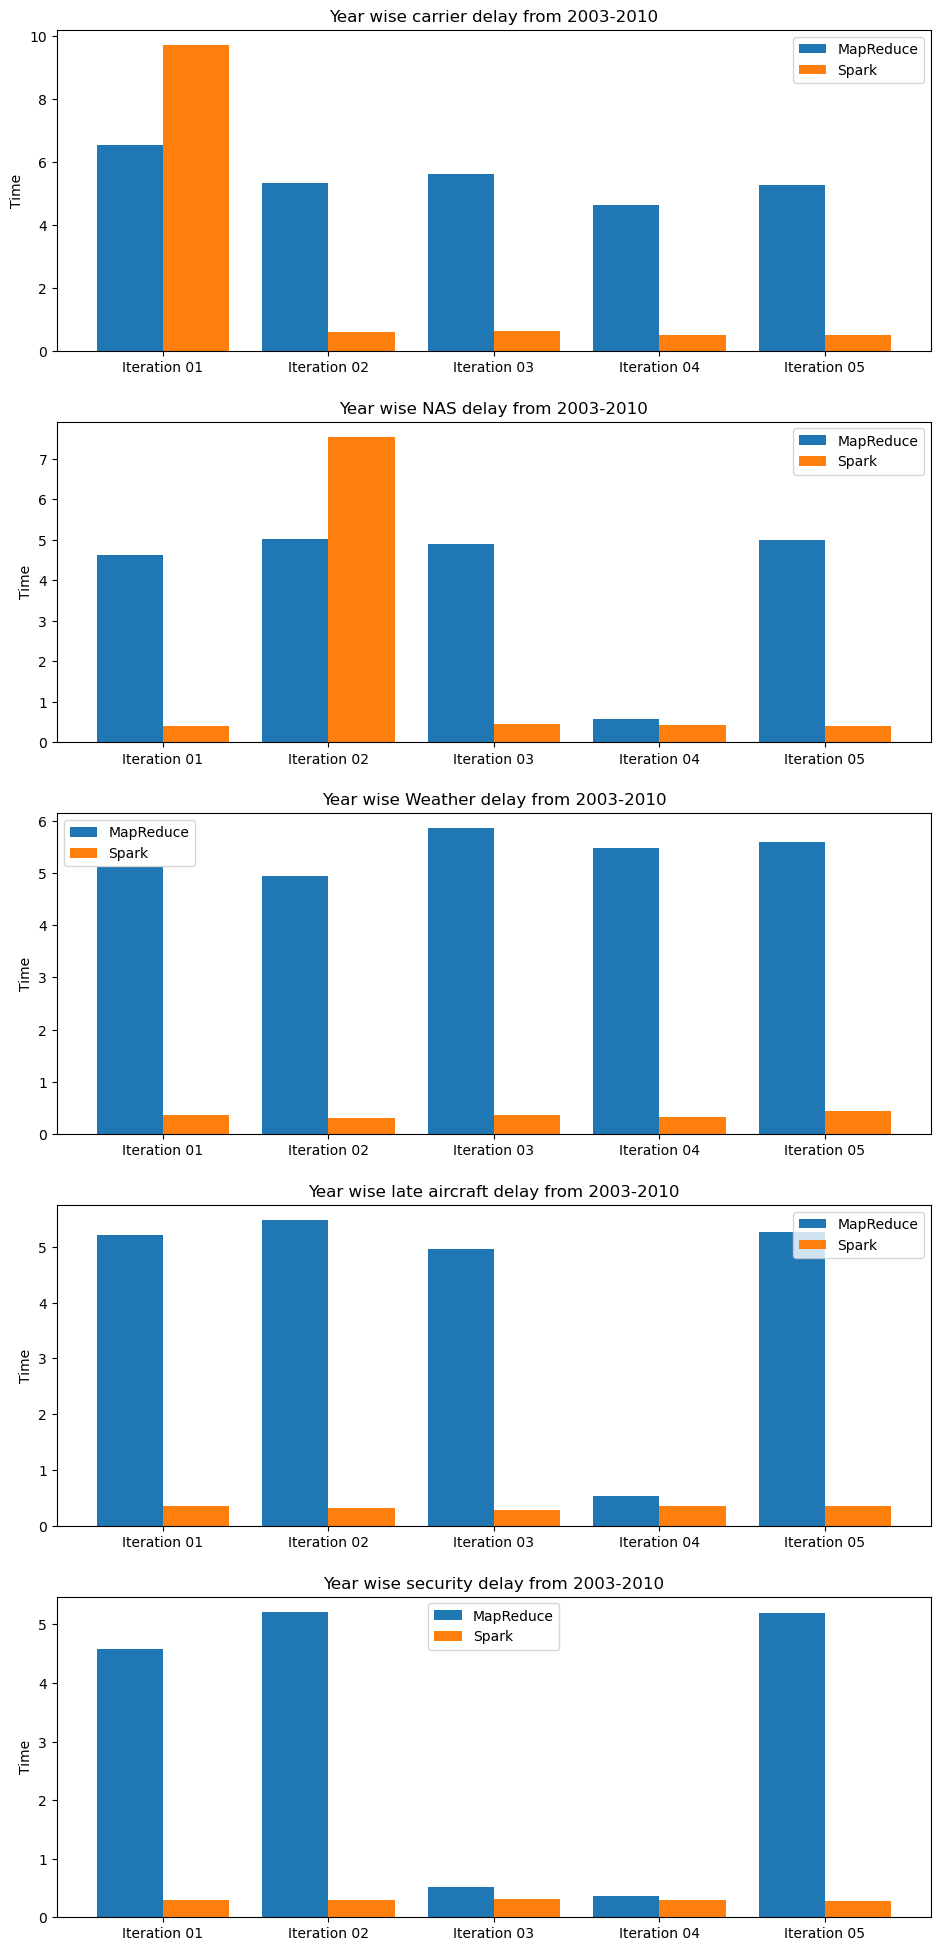

In [3]:
# Prepare data for plotting
iterations = ['Iteration 01', 'Iteration 02', 'Iteration 03', 'Iteration 04', 'Iteration 05']
tasks = map_reduce_df['Task'].unique()

# Set up the plotting environment
fig, axs = plt.subplots(len(tasks), 1, figsize=(10, 20), facecolor='white')
fig.tight_layout(pad=3.0)

for i, task in enumerate(tasks):
    axs[i].bar(iterations, map_reduce_df[map_reduce_df['Task'] == task][iterations].values.flatten(), width=-0.4, align='edge', label='MapReduce')
    axs[i].bar(iterations, spark_df[spark_df['Task'] == task][iterations].values.flatten(), width=0.4, align='edge', label='Spark')
    axs[i].set_title(task)
    axs[i].set_ylabel('Time')
    axs[i].legend()

plt.show()

In [7]:
# Calculate the average time taken by MapReduce and Spark for each task
map_reduce_avg = map_reduce_df[iterations].mean(axis=1)
spark_avg = spark_df[iterations].mean(axis=1)

# Add the average times to the original dataframes
df_avg = pd.DataFrame({'Task': tasks, 'MapReduce Avg Time': map_reduce_avg, 'Spark Avg Time': spark_avg})
df_avg


,Task,MapReduce Avg Time,Spark Avg Time
0,Year wise carrier delay from 2003-2010,5.4870,2.3826
1,Year wise NAS delay from 2003-2010,4.0266,1.8422
2,Year wise Weather delay from 2003-2010,5.4046,0.3560
3,Year wise late aircraft delay from 2003-2010,4.2876,0.3254
4,Year wise security delay from 2003-2010,3.1750,0.2952


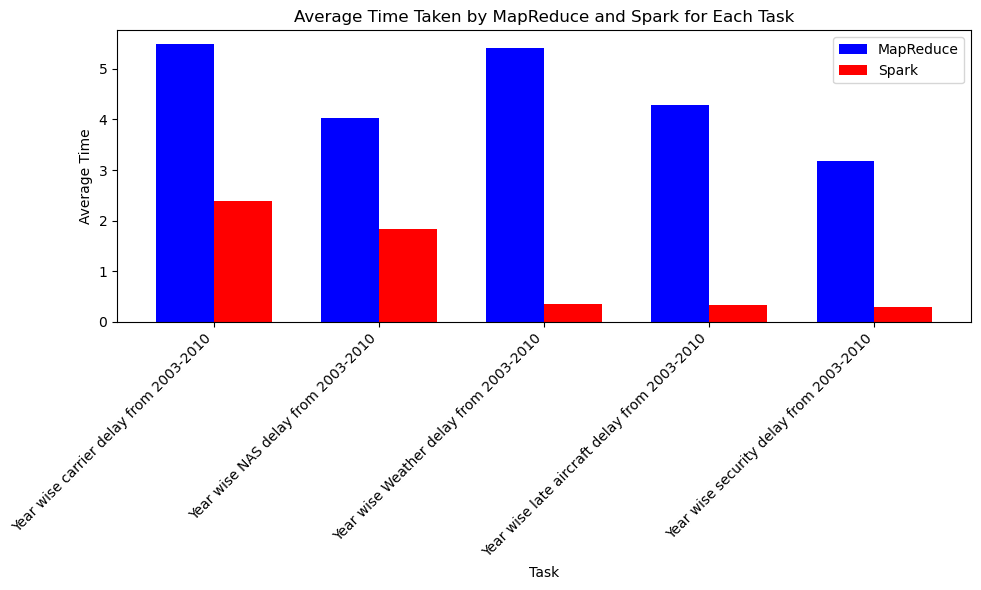

In [6]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
width = 0.35

# Setting positions for the groups
r1 = range(len(df_avg))
r2 = [x + width for x in r1]

plt.bar(r1, df_avg['MapReduce Avg Time'], color='b', width=width, label='MapReduce')
plt.bar(r2, df_avg['Spark Avg Time'], color='r', width=width, label='Spark')

plt.xlabel('Task')
plt.ylabel('Average Time')
plt.title('Average Time Taken by MapReduce and Spark for Each Task')
plt.xticks([r + width/2 for r in range(len(df_avg))], df_avg['Task'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()